# ___AN ANALYSIS OF FAKE NEWS DETECTION___

# Models Based on Term Frequency

In [1]:
import os 
os.chdir('/Users/erik/Documents/HKU/STAT8017 Data Mining/project')
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import seaborn as sns

df=pd.read_csv('train.csv')
df.isnull().sum()

Statement    0
Label        0
dtype: int64

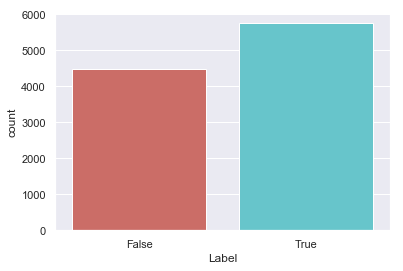

In [12]:
sns.set(style="darkgrid")
#by calling below we can see that data set is failry evenly distributed between the classes
sns.countplot(x='Label', data=df, palette='hls')


In [2]:
dt, dtTest=train_test_split(df, test_size = 0.15, random_state = 8017) 
xTrain, xTest, yTrain, yTest = dt['Statement'], dtTest['Statement'], dt['Label'], dtTest['Label']
dt.head()


,Statement,Label
7490,Says the U.S. national debt has tripled during...,True
2556,Says Scott Walker cut taxes for the wealthiest...,True
7514,Says you cannot implement Paul Ryans plan with...,True
1363,"Under Pat McCrory, (North Carolina) has fallen...",False
1847,"Says that Mitt Romney, while he was in Arizona...",False


In [3]:
# exploration on training data
#amount of words,chars
dt['word_count']=dt['Statement'].apply(lambda x:len(str(x).split(" ")))
dt['char_count']=dt['Statement'].str.len()
#average words
def avg_word(sentence):
    words=sentence.split()
    return (sum(len(word) for word in words)/len(words))

dt['avg_word']=dt['Statement'].apply(lambda x:avg_word(x))

#stopwords
from nltk.corpus import stopwords
stop=stopwords.words('english')
dt['stopwords']=dt['Statement'].apply(lambda sen:len([x for x in sen.split() if x in stop]))

#count for numbers
dt['numerics']=dt['Statement'].apply(lambda sen:len([x for x in sen.split() if x.isdigit()]))

## transfer to lower case
dt['Statement']=dt['Statement'].apply(lambda sen:" ".join(x.lower() for x in sen.split()))
dt['Statement']= dt['Statement'].str.replace('[^\w\s]','')
from nltk.corpus import stopwords
stop=stopwords.words('english')
dt['Statement']=dt['Statement'].apply(lambda sen:" ".join(x for x in sen.split() if x not in stop))
dt['Statement'].head()

/Users/erik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/erik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/erik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

7490    says us national debt tripled rep greg waldens...
2556    says scott walker cut taxes wealthiest raised ...
7514    says cannot implement paul ryans plan without ...
1363    pat mccrory north carolina fallen 41st teacher...
1847    says mitt romney arizona said believes states ...
Name: Statement, dtype: object

In [4]:
dt.head()

,Statement,Label,word_count,char_count,avg_word,stopwords,numerics
7490,says us national debt tripled rep greg waldens...,True,14,82,4.928571,4,0
2556,says scott walker cut taxes wealthiest raised ...,True,15,94,5.333333,4,0
7514,says cannot implement paul ryans plan without ...,True,14,88,5.357143,4,0
1363,pat mccrory north carolina fallen 41st teacher...,False,12,70,4.916667,3,0
1847,says mitt romney arizona said believes states ...,False,26,150,4.807692,11,1


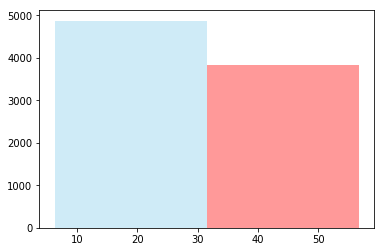

In [28]:
#hist_kws=dict(edgecolor='k',linewidth=1)
plt.subplots(1, 1)
sns.distplot( [dt[dt['Label'] == True]["numerics"], dt[dt['Label'] == False]["numerics"]], bins=1, kde=False, color=['skyblue', 'red'])


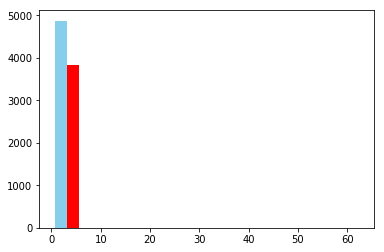

In [31]:
plt.hist([dt[dt['Label'] == True]["numerics"], dt[dt['Label'] == False]["numerics"]],color=['skyblue', 'red'])
plt.show()

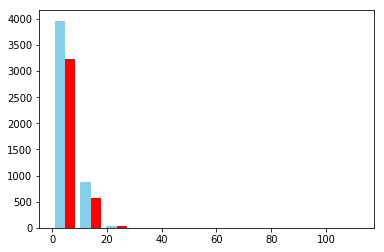

In [36]:
plt.hist([dt[dt['Label'] == True]["stopwords"], dt[dt['Label'] == False]["stopwords"]],color=['skyblue', 'red'],bins=12)
plt.show()

/Users/erik/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


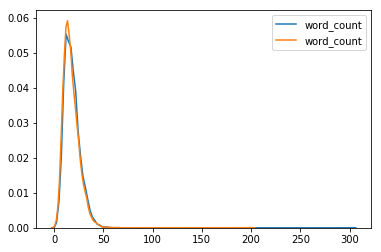

In [5]:
dt['Label']== True
#kdeplot(dt['word_count'][dt['Label']== True], data2=None, shade=False, vertical=False, kernel='gau', bw='scott', gridsize=100, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)
sns.kdeplot(dt['word_count'][dt['Label']== True], shade=False, vertical=False, kernel='gau', bw='scott', )
sns.kdeplot(dt['word_count'][dt['Label']!= True], shade=False, vertical=False, kernel='gau', bw='scott', )
plt.legend();


/Users/erik/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


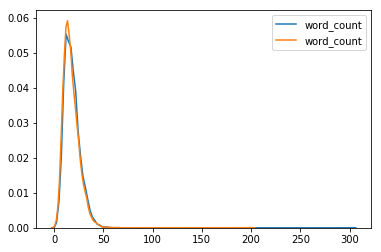

In [5]:
dt['Label']== True
#kdeplot(dt['word_count'][dt['Label']== True], data2=None, shade=False, vertical=False, kernel='gau', bw='scott', gridsize=100, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)
sns.kdeplot(dt['word_count'][dt['Label']== True], shade=False, vertical=False, kernel='gau', bw='scott', )
sns.kdeplot(dt['word_count'][dt['Label']!= True], shade=False, vertical=False, kernel='gau', bw='scott', )
plt.legend();


In [54]:
porter = PorterStemmer()
def stem_tokens(tokens,stemmer):
    return [stemmer.stem(item) for item in tokens]
text1="".join(stem_tokens(dt['Statement'][dt['Label']== True],porter))
text2="".join(stem_tokens(dt['Statement'][dt['Label']== False],porter))

len(text1)

375768

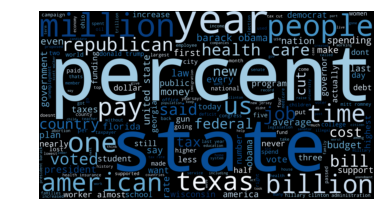

In [55]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=4560, height=2560, colormap="Blues").generate(text1)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

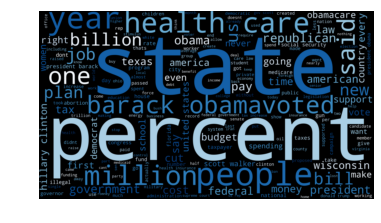

In [56]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=4560, height=2560, colormap="Blues").generate(text2)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [7]:
dt['word_count'][dt['Label']== True]

7490    14
2556    15
7514    14
2492    16
4995    12
322     24
748     14
4199    17
2767    11
8070    13
2871    17
3350    16
92       9
9651    13
1902    37
398     24
3238    20
9442    10
2969     6
6945    12
2874    26
7476     7
59      20
7952    17
3253    12
6648    27
4859    27
2734    13
2158    11
7274    18
        ..
1548    12
3675    17
5639    16
5785     8
4710    19
4003    11
4263    32
7796    17
9677    15
8715    29
4013    26
4894    23
1003    12
2341    18
410     18
6967    15
9434    29
546     25
6904    29
2745    13
9707     9
2030    15
6425    15
667     20
7495    17
7028    12
2563    17
6596    13
6420    12
619     15
Name: word_count, Length: 4877, dtype: int64

In [8]:
print(xTrain)

7490     says us national debt tripled rep greg waldens...
2556     says scott walker cut taxes wealthiest raised ...
7514     says cannot implement paul ryans plan without ...
1363     pat mccrory north carolina fallen 41st teacher...
1847     says mitt romney arizona said believes states ...
2492     says sen john mccain taken money wall street s...
4995     polls showhillary clinton wins every time dona...
322      wisconsins governor cuts perquisites much plan...
748            minute proposal nearbeach oil drilling came
6747     jobless rate unemployment rate lowest big citi...
8249      last time saw chevrolet japan doesnt exist folks
10106    says terry mcauliffe opposes virginias rightto...
4199     two days interest pay china enough buy one joi...
8342                     governor crist 3000 teachers laid
2767     says region 2011 worst drought year ever recorded
8070     prenatal diagnosis 90 percent syndrome childre...
2871     costs cancer affiliated issues 20 billion year.

In [9]:
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
#from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [10]:
countV = CountVectorizer()


In [53]:
nb_pipeline = Pipeline([
        ('NBCV',countV),
        ('nb_clf',MultinomialNB())])

nb_pipeline.fit(dt['Statement'],dt['Label'])
predicted_nb = nb_pipeline.predict(dtTest['Statement'])
np.mean(predicted_nb == dtTest['Label'])


0.6223958333333334

In [94]:
random_forest = Pipeline([
        ('rfCV',countV),
        ('rf_clf',RandomForestClassifier(n_estimators=200,n_jobs=-1))
        ])
    
random_forest.fit(dt['Statement'],dt['Label'])
predicted_rf = random_forest.predict(dtTest['Statement'])
np.mean(predicted_rf == dtTest['Label'])



0.6321614583333334

In [90]:
tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=True)


In [59]:
##Now using n-grams
#naive-bayes classifier
nb_pipeline_ngram = Pipeline([
        ('nb_tfidf',tfidf_ngram),
        ('nb_clf',MultinomialNB())])

nb_pipeline_ngram.fit(dt['Statement'],dt['Label'])
predicted_nb_ngram = nb_pipeline_ngram.predict(dtTest['Statement'])
np.mean(predicted_nb_ngram == dtTest['Label'])


0.619140625

In [82]:
#random forest classifier
random_forest_ngram = Pipeline([
        ('rf_tfidf',tfidf_ngram),
        ('rf_clf',RandomForestClassifier(n_estimators=200,n_jobs=3))
        ])
    
random_forest_ngram.fit(dt['Statement'],dt['Label'])
predicted_rf_ngram = random_forest_ngram.predict(dtTest['Statement'])
np.mean(predicted_rf_ngram == dtTest['Label'])


0.5930989583333334

In [70]:
random_forest_ngram.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
     steps=[('rf_tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 4), norm='l2', preprocessor=None, smooth_idf=Tr...n_jobs=3,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])>

## Hyper-parameter Tuning with GridsearchCV

In [11]:
#grid-search parameter optimization
#random forest classifier
tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=True)
random_forest_ngram = Pipeline([
        ('rf_tfidf',tfidf_ngram),
        ('rf_clf',RandomForestClassifier(n_estimators=200,n_jobs=3))
        ])
#random forest classifier parameters
parameters = {'rf_tfidf__ngram_range': [(1, 1), (1, 2),(1,3),(1,4)],
               'rf_tfidf__use_idf': (True, False),
               #'rf_clf__max_depth': (7,9,10,11,13,14,15,18,20,22,25),
               'rf_clf__n_estimators': (20,50,100,200,300)
}

gs_clf = GridSearchCV(random_forest_ngram, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(dt['Statement'],dt['Label'])

gs_clf.best_score_
gs_clf.best_params_


/Users/erik/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'rf_clf__n_estimators': 100,
 'rf_tfidf__ngram_range': (1, 1),
 'rf_tfidf__use_idf': False}

In [12]:
k=gs_clf.predict(dtTest['Statement'])

In [14]:
np.mean(k==dtTest['Label'])

0.609375

In [58]:
#grid-search parameter optimization
#random forest classifier
random_forest = Pipeline([
        ('rfCV',countV),
        ('rf_clf',RandomForestClassifier(n_estimators=300,n_jobs=-1))
        ])
    
#random forest classifier parameters
parameters = {
               'rf_clf__min_samples_leaf':(1,2,4,6),
               'rf_clf__min_impurity_split ':(1e-7,1e-5,1e-3,1e-1)
}

gs_clf_count = GridSearchCV(random_forest, parameters, n_jobs=-1)
gs_clf_count = gs_clf.fit(dt['Statement'],dt['Label'])

print(gs_clf_count.best_score_)
print(gs_clf_count.best_params_)


/Users/erik/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.5968520220588235
{'rf_clf__n_estimators': 300, 'rf_tfidf__ngram_range': (1, 1), 'rf_tfidf__use_idf': True}


In [57]:
#grid-search parameter optimization
#random forest classifier
random_forest = Pipeline([
        ('rfCV',countV),
        ('rf_clf',RandomForestClassifier(n_estimators=200,n_jobs=-1))
        ])
    
#random forest classifier parameters
parameters = {
               'rf_clf__n_estimators': (50,100,200,300),
               'rf_clf__min_samples_leaf':(1,2,4,6),
               'rf_clf__min_impurity_split ':(1e-7,1e-5,1e-3,1e-1)
}

gs_clf_count = GridSearchCV(random_forest, parameters, n_jobs=-1)
gs_clf_count = gs_clf.fit(dt['Statement'],dt['Label'])
gs_clf_count.best_params_

{'rf_clf__n_estimators': 300,
 'rf_tfidf__ngram_range': (1, 1),
 'rf_tfidf__use_idf': True}

In [16]:
predcted_cls=gs_clf_count.predict(dtTest['Statement'])
np.mean(predcted_cls==dtTest['Label'])

0.6302083333333334

# Models Based on Neural Network

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt
import keras.backend as K
from gensim.models import Doc2Vec
from gensim.models.doc2vec import LabeledSentence
from gensim.utils import to_unicode
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Dropout, Embedding
from keras.models import Sequential
from keras.optimizers import RMSprop, SGD
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier
from keras.engine.topology import Layer
from keras import initializers
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.externals import joblib
from collections import Counter


Using TensorFlow backend.
C:\Users\Xu\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
import warnings

def deprecation():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    deprecation()

In [3]:
# Load data
path = "C:/Users/Xu/PycharmProjects/STAT8017_Project/train.csv"
fake_news = pd.read_csv(path)

In [4]:
def cleansing(data):
    data = data.lower() # Convert to lower-case
    data = data.replace(r'http[\w:/\.]+','<URL>') # Remove URL, if any
    data = data.replace(r'[^\.\w\s]','') # Remove non-Unicode-word characters
    data = data.replace(r'\.\.+','.') # Replace '..' with '.'
    data = data.replace(r'\s\s+',' ') # Replace '  ' with ' '
    data = data.replace('\\"', '') # Strip escaped quotes
    data = data.replace('"', '') # Strip quotes
    data = data.strip()
    return data

In [5]:
# Data preprocessing (cleanse, train-test split)
fake_news['statement_cleaned'] = fake_news['Statement'].apply(cleansing)

vectorizer = CountVectorizer(binary=True, stop_words=stopwords.words('english'), 
                             lowercase=True, min_df=3, max_df=0.9, max_features=8000)

X_train, X_test, y_train, y_test = train_test_split(fake_news['statement_cleaned'], fake_news['Label'], test_size=0.1)
X_train_onehot = vectorizer.fit_transform(X_train)
X_test_onehot = vectorizer.transform(X_test)

## ANN

### _ANN without embedding_

In [7]:
# Define hyper-param grid for tuning ANN
param_ANN = {'cells': [2 ** x for x in range(5, 11)], 'opt': ['adam'], 
             'drop': [0.1, 0.2, 0.3, 0.5, 0.7],
             'batch_size': [64, 128, 256], 'epochs': [3, 5], 'layer': range(1, 5)}

In [6]:
%load_ext autotime
# Define ANN model
def create_ANN(layer=1, actv='relu', opt='adam', drop=0.0, cells=16):
    model = Sequential()
    
    if layer == 1:
        model.add(Dense(units=cells, activation=actv, 
                        input_dim=len(vectorizer.get_feature_names())))
        model.add(Dropout(drop))
    
    if layer == 2:
        model.add(Dense(units=cells, activation=actv, 
                        input_dim=len(vectorizer.get_feature_names())))
        model.add(Dropout(drop))
        model.add(Dense(units=int(cells / 2), activation=actv))
        model.add(Dropout(drop))
    
    if layer == 3:
        model.add(Dense(units=cells, activation=actv, 
                        input_dim=len(vectorizer.get_feature_names())))
        model.add(Dropout(drop))
        model.add(Dense(units=int(cells / 2), activation=actv))
        model.add(Dropout(drop))
        model.add(Dense(units=int(cells / 4), activation=actv))
        model.add(Dropout(drop))
    
    if layer == 4:
        model.add(Dense(units=cells, activation=actv, 
                        input_dim=len(vectorizer.get_feature_names())))
        model.add(Dropout(drop))
        model.add(Dense(units=int(cells / 2), activation=actv))
        model.add(Dropout(drop))
        model.add(Dense(units=int(cells / 4), activation=actv))
        model.add(Dropout(drop))
        model.add(Dense(units=int(cells / 8), activation=actv))
        model.add(Dropout(drop))
        
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [8]:
model_ANN = KerasClassifier(build_fn=create_ANN, verbose=1)

# Initialize gridsearchcv, multiprocessing on GPU is hard to configure
grid_ANN = GridSearchCV(estimator=model_ANN, param_grid=param_ANN, 
                    cv=ShuffleSplit(n_splits=1, test_size=0.1, random_state=8017), n_jobs=1)

# Training and tuning
grid_result_ANN = grid_ANN.fit(X_train_onehot, y_train)
joblib.dump(grid_ANN.best_estimator_, 'best_ANN.pkl')

# Summarize results
print("Best: %f using %s" % (grid_result_ANN.best_score_, grid_result_ANN.best_params_))
means_ANN = grid_result_ANN.cv_results_['mean_test_score']
params_ANN = grid_result_ANN.cv_results_['params']
for mean, param in zip(means_ANN, params_ANN):
    print("%f with: %r" % (mean, param))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/3
8294/8294 [==============================] - 2s 288us/step - loss: 0.6741 - acc: 0.5744
Epoch 2/3
8294/8294 [==============================] - 1s 78us/step - loss: 0.6038 - acc: 0.6904
Epoch 3/3
8294/8294 [==============================] - 0s 48us/step
Epoch 1/3
8294/8294 [==============================] - 1s 108us/step - loss: 0.6746 - acc: 0.5663
Epoch 2/3
8294/8294 [==============================] - ETA: 0s - loss: 0.6064 - acc: 0.678 - 1s 83us/step - loss: 0.6062 - acc: 0.6776
Epoch 3/3
8294/8294 [==============================] - 0s 49us/step
Epoch 1/3
8294/8294 [==============================] - 1s 133us/step - loss: 0.6774 - acc: 0.5606
Epoch 2/3
8294/8294 [==============================] - 1s 88us/step - loss: 0.6158 - acc: 0.6688
Epoch 

8294/8294 [==============================] - 1s 94us/step - loss: 0.6742 - acc: 0.5579: 0s - loss: 0.6777 -
Epoch 3/5
8294/8294 [==============================] - 1s 89us/step - loss: 0.6595 - acc: 0.5608
Epoch 4/5
8294/8294 [==============================] - 1s 93us/step - loss: 0.6361 - acc: 0.5978
Epoch 5/5
8294/8294 [==============================] - 0s 58us/step
Epoch 1/5
8294/8294 [==============================] - 2s 288us/step - loss: 0.6909 - acc: 0.5528
Epoch 2/5
8294/8294 [==============================] - ETA: 0s - loss: 0.6884 - acc: 0.556 - 1s 95us/step - loss: 0.6882 - acc: 0.5576
Epoch 3/5
8294/8294 [==============================] - 1s 100us/step - loss: 0.6864 - acc: 0.5593 0s - loss: 0.6880
Epoch 4/5
8294/8294 [==============================] - ETA: 0s - loss: 0.6867 - acc: 0.560 - 1s 97us/step - loss: 0.6869 - acc: 0.5598
Epoch 5/5
8294/8294 [==============================] - 0s 56us/step
Epoch 1/3
8294/8294 [==============================] - 2s 264us/step - loss: 0

8294/8294 [==============================] - 1s 121us/step - loss: 0.6322 - acc: 0.6430
Epoch 3/5
8294/8294 [==============================] - 1s 120us/step - loss: 0.5337 - acc: 0.7470
Epoch 4/5
8294/8294 [==============================] - 1s 123us/step - loss: 0.4136 - acc: 0.8240
Epoch 5/5
8294/8294 [==============================] - 1s 80us/step
Epoch 1/5
8294/8294 [==============================] - 4s 537us/step - loss: 0.6849 - acc: 0.5512
Epoch 2/5
8294/8294 [==============================] - 1s 125us/step - loss: 0.6522 - acc: 0.6191
Epoch 3/5
8294/8294 [==============================] - 1s 129us/step - loss: 0.5781 - acc: 0.7130
Epoch 4/5
8294/8294 [==============================] - 1s 127us/step - loss: 0.4765 - acc: 0.7870
Epoch 5/5
8294/8294 [==============================] - 1s 83us/step
Epoch 1/3
8294/8294 [==============================] - 4s 507us/step - loss: 0.6757 - acc: 0.5746
Epoch 2/3
8294/8294 [==============================] - ETA: 0s - loss: 0.6175 - acc: 0.673

8294/8294 [==============================] - 6s 733us/step - loss: 0.6755 - acc: 0.5733
Epoch 2/5
8294/8294 [==============================] - 1s 120us/step - loss: 0.5709 - acc: 0.7112
Epoch 3/5
8294/8294 [==============================] - 1s 118us/step - loss: 0.3813 - acc: 0.8366
Epoch 4/5
8294/8294 [==============================] - 1s 119us/step - loss: 0.1777 - acc: 0.9340
Epoch 5/5
8294/8294 [==============================] - 1s 85us/step
Epoch 1/5
8294/8294 [==============================] - 6s 744us/step - loss: 0.6779 - acc: 0.5668
Epoch 2/5
8294/8294 [==============================] - 1s 129us/step - loss: 0.5999 - acc: 0.6864
Epoch 3/5
8294/8294 [==============================] - 1s 126us/step - loss: 0.4284 - acc: 0.8183
Epoch 4/5
8294/8294 [==============================] - 1s 127us/step - loss: 0.2266 - acc: 0.9151
Epoch 5/5
8294/8294 [==============================] - 1s 85us/step
Epoch 1/3
8294/8294 [==============================] - 6s 737us/step - loss: 0.6674 - acc:

Epoch 2/5
8294/8294 [==============================] - 1s 140us/step - loss: 0.6509 - acc: 0.6244
Epoch 3/5
8294/8294 [==============================] - 1s 133us/step - loss: 0.5773 - acc: 0.7109
Epoch 4/5
8294/8294 [==============================] - 1s 133us/step - loss: 0.4794 - acc: 0.7889
Epoch 5/5
8294/8294 [==============================] - 1s 90us/step
Epoch 1/5
8294/8294 [==============================] - 7s 873us/step - loss: 0.6902 - acc: 0.5376
Epoch 2/5
8294/8294 [==============================] - 1s 137us/step - loss: 0.6800 - acc: 0.5631
Epoch 3/5
8294/8294 [==============================] - 1s 137us/step - loss: 0.6539 - acc: 0.6020
Epoch 4/5
8294/8294 [==============================] - 1s 135us/step - loss: 0.6100 - acc: 0.6853
Epoch 5/5
8294/8294 [==============================] - 1s 95us/step
Epoch 1/3
8294/8294 [==============================] - 7s 895us/step - loss: 0.6779 - acc: 0.5632
Epoch 2/3
8294/8294 [==============================] - 1s 129us/step - loss: 0.6

8294/8294 [==============================] - 1s 150us/step - loss: 0.3551 - acc: 0.8482
Epoch 4/5
8294/8294 [==============================] - 1s 149us/step - loss: 0.1438 - acc: 0.9506
Epoch 5/5
8294/8294 [==============================] - 1s 106us/step
Epoch 1/5
8294/8294 [==============================] - 11s 1ms/step - loss: 0.6795 - acc: 0.5652
Epoch 2/5
8294/8294 [==============================] - 1s 161us/step - loss: 0.6007 - acc: 0.6880
Epoch 3/5
8294/8294 [==============================] - 1s 161us/step - loss: 0.4167 - acc: 0.8232
Epoch 4/5
8294/8294 [==============================] - 1s 158us/step - loss: 0.1948 - acc: 0.9269
Epoch 5/5
8294/8294 [==============================] - 1s 112us/step
Epoch 1/3
8294/8294 [==============================] - 10s 1ms/step - loss: 0.6712 - acc: 0.5774
Epoch 2/3
8294/8294 [==============================] - 1s 142us/step - loss: 0.5800 - acc: 0.7070
Epoch 3/3
8294/8294 [==============================] - 1s 97us/step
Epoch 1/3
8294/8294 [=

8294/8294 [==============================] - 1s 172us/step - loss: 0.2201 - acc: 0.9150
Epoch 4/5
8294/8294 [==============================] - 1s 178us/step - loss: 0.0524 - acc: 0.9817
Epoch 5/5
8294/8294 [==============================] - 1s 105us/step
Epoch 1/5
8294/8294 [==============================] - 14s 2ms/step - loss: 0.6705 - acc: 0.5804
Epoch 2/5
8294/8294 [==============================] - 2s 183us/step - loss: 0.5305 - acc: 0.7423
Epoch 3/5
8294/8294 [==============================] - 2s 186us/step - loss: 0.2446 - acc: 0.8982
Epoch 4/5
8294/8294 [==============================] - 2s 181us/step - loss: 0.0640 - acc: 0.9769
Epoch 5/5
8294/8294 [==============================] - 1s 112us/step
Epoch 1/3
8294/8294 [==============================] - 13s 2ms/step - loss: 0.6632 - acc: 0.5896
Epoch 2/3
8294/8294 [==============================] - 1s 168us/step - loss: 0.5299 - acc: 0.7496
Epoch 3/3
8294/8294 [==============================] - 1s 103us/step
Epoch 1/3
8294/8294 [

8294/8294 [==============================] - 2s 230us/step - loss: 0.1474 - acc: 0.9450
Epoch 4/5
8294/8294 [==============================] - 2s 231us/step - loss: 0.0278 - acc: 0.9910
Epoch 5/5
8294/8294 [==============================] - 1s 124us/step
Epoch 1/5
8294/8294 [==============================] - 17s 2ms/step - loss: 0.6689 - acc: 0.5926
Epoch 2/5
8294/8294 [==============================] - 2s 233us/step - loss: 0.4826 - acc: 0.7725
Epoch 3/5
8294/8294 [==============================] - 2s 235us/step - loss: 0.1560 - acc: 0.9396
Epoch 4/5
8294/8294 [==============================] - 2s 234us/step - loss: 0.0364 - acc: 0.9888
Epoch 5/5
8294/8294 [==============================] - 1s 126us/step
Epoch 1/3
8294/8294 [==============================] - 17s 2ms/step - loss: 0.6634 - acc: 0.5960
Epoch 2/3
8294/8294 [==============================] - 2s 216us/step - loss: 0.4945 - acc: 0.7716
Epoch 3/3
8294/8294 [==============================] - 1s 131us/step
Epoch 1/3
8294/8294 [

8294/8294 [==============================] - 2s 288us/step - loss: 0.6426 - acc: 0.6271
Epoch 3/5
8294/8294 [==============================] - 2s 280us/step - loss: 0.5579 - acc: 0.7203
Epoch 4/5
8294/8294 [==============================] - 2s 272us/step - loss: 0.4363 - acc: 0.8066
Epoch 5/5
8294/8294 [==============================] - 1s 163us/step
Epoch 1/5
8294/8294 [==============================] - 21s 3ms/step - loss: 0.6959 - acc: 0.5287
Epoch 2/5
8294/8294 [==============================] - 2s 281us/step - loss: 0.6877 - acc: 0.5456
Epoch 3/5
8294/8294 [==============================] - 2s 279us/step - loss: 0.6712 - acc: 0.5762
Epoch 4/5
8294/8294 [==============================] - 3s 310us/step - loss: 0.6353 - acc: 0.6424 ETA: 0s - loss: 0.6347 - acc:
Epoch 5/5
8294/8294 [==============================] - 1s 167us/step
Epoch 1/3
8294/8294 [==============================] - 20s 2ms/step - loss: 0.6801 - acc: 0.5644
Epoch 2/3
8294/8294 [==============================] - 1s 11

8294/8294 [==============================] - 1s 111us/step
Epoch 1/5
8294/8294 [==============================] - 25s 3ms/step - loss: 0.6909 - acc: 0.5346
Epoch 2/5
8294/8294 [==============================] - 1s 133us/step - loss: 0.6824 - acc: 0.5615
Epoch 3/5
8294/8294 [==============================] - 1s 130us/step - loss: 0.6728 - acc: 0.5762
Epoch 4/5
8294/8294 [==============================] - 1s 138us/step - loss: 0.6541 - acc: 0.6097
Epoch 5/5
8294/8294 [==============================] - 1s 113us/step
Epoch 1/5
8294/8294 [==============================] - 25s 3ms/step - loss: 0.6924 - acc: 0.5471
Epoch 2/5
8294/8294 [==============================] - 1s 139us/step - loss: 0.6881 - acc: 0.5603
Epoch 3/5
8294/8294 [==============================] - 1s 140us/step - loss: 0.6861 - acc: 0.5622
Epoch 4/5
8294/8294 [==============================] - 1s 139us/step - loss: 0.6856 - acc: 0.5596
Epoch 5/5
8294/8294 [==============================] - 1s 110us/step
Epoch 1/3
8294/8294 [

8294/8294 [==============================] - 1s 140us/step - loss: 0.4273 - acc: 0.8150
Epoch 5/5
8294/8294 [==============================] - 1s 120us/step
Epoch 1/5
8294/8294 [==============================] - 30s 4ms/step - loss: 0.6886 - acc: 0.5412
Epoch 2/5
8294/8294 [==============================] - 1s 148us/step - loss: 0.6601 - acc: 0.5993
Epoch 3/5
8294/8294 [==============================] - 1s 146us/step - loss: 0.5876 - acc: 0.7076
Epoch 4/5
8294/8294 [==============================] - 1s 147us/step - loss: 0.4804 - acc: 0.7898 1s - loss: 0
Epoch 5/5
8294/8294 [==============================] - 1s 120us/step
Epoch 1/5
8294/8294 [==============================] - 29s 4ms/step - loss: 0.6902 - acc: 0.5426
Epoch 2/5
8294/8294 [==============================] - 1s 148us/step - loss: 0.6811 - acc: 0.5620
Epoch 3/5
8294/8294 [==============================] - 1s 148us/step - loss: 0.6447 - acc: 0.6353
Epoch 4/5
8294/8294 [==============================] - 1s 148us/step - loss: 

C:\Users\Xu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ResourceExhaustedError: OOM when allocating tensor with shape[128,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node dropout_824/cond/mul}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[{{node metrics_330/acc/Mean_1}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


time: 2h 21min 17s


In [22]:
# Define function for ploting confusion matirx
def plot_cm(y_true, y_pred):
    skplt.plot_confusion_matrix(y_true, y_pred)
    plt.show()

time: 998 µs


In [13]:
# Since the above code yielded a ResourceExhaustedError (OOM) even when
# running on a GTX1070 with 8Gb video memory, we will consider methods like
# automated hyper-parameter optimization during next stage of our project.

# For presentation purpose, we display the best model that we manually
# tunned and selected before we work on GridSearchCV.

pre_sel_model_ANN = Sequential()
 
pre_sel_model_ANN.add(Dense(units=500, activation='relu', input_dim=len(vectorizer.get_feature_names())))
pre_sel_model_ANN.add(Dense(units=400, activation='relu', input_dim=len(vectorizer.get_feature_names())))
pre_sel_model_ANN.add(Dense(units=300, activation='relu', input_dim=len(vectorizer.get_feature_names())))
pre_sel_model_ANN.add(Dense(units=200, activation='relu', input_dim=len(vectorizer.get_feature_names())))
pre_sel_model_ANN.add(Dense(units=100, activation='relu', input_dim=len(vectorizer.get_feature_names())))
pre_sel_model_ANN.add(Dense(units=1, activation='sigmoid'))

pre_sel_model_ANN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
pre_sel_model_ANN.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               2301000   
_________________________________________________________________
dense_2 (Dense)              (None, 400)               200400    
_________________________________________________________________
dense_3 (Dense)              (None, 300)               120300    
_________________________________________________________________
dense_4 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 2,702,101
Trainable params: 2,702,101
Non-trainable para

In [29]:
pre_sel_model_ANN.fit(X_train_onehot[:-2000], y_train[:-2000],
          epochs=2, batch_size=256, verbose=1, 
          validation_data=(X_train_onehot[-2000:], y_train[-2000:]))

Train on 6192 samples, validate on 2000 samples
Epoch 1/2
6192/6192 [==============================] - 4s 647us/step - loss: 0.6752 - acc: 0.5699 - val_loss: 0.6745 - val_acc: 0.5705
Epoch 2/2
6192/6192 [==============================] - 3s 414us/step - loss: 0.5043 - acc: 0.7676 - val_loss: 0.7918 - val_acc: 0.5845


In [30]:
scores = pre_sel_model_ANN.evaluate(vectorizer.transform(X_test), y_test, verbose=1)
print("Accuracy:", scores[1])

2048/2048 [==============================] - 0s 196us/step
Accuracy: 0.583984375


### _ANN with Doc2Vec embedding_

In [8]:
def CleanStopword(text):
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = text.lower().split()
    stops = set(stopwords.words("english")) 
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return (text)

In [9]:
def cleanup(text):
    text = CleanStopword(text)
    text.maketrans("", "", string.punctuation)
    #text = text.translate(str.maketrans("", "", string.punctuation))
    return text

In [10]:
def constructLabeledSentences(data):
    sentences = []
    for index, row in data.iteritems():
        sentences.append(LabeledSentence(to_unicode(row).split(), ['Text' + '_%s' % str(index)]))
    return sentences

In [11]:
# Define function to perform word embedding using Doc2Vec method
def getEmbeddings(path, vector_dimension=300):
    """
    Generate Doc2Vec embedded train-test data
    """
    data = pd.read_csv(path)

    #missing_rows = []
    #for i in range(len(data)):
    #    if data.loc[i, 'Statement'] != data.loc[i, 'Statement']:
    #        missing_rows.append(i)
    #data = data.drop(missing_rows).reset_index().drop(['index','id'],axis=1)

    for i in range(len(data)):
        data.loc[i, 'Statement'] = cleanup(data.loc[i,'Statement'])

    x = constructLabeledSentences(data['Statement'])
    y = (data.Label.values).astype('int')

    # The Doc2Vec model parameters are subject to further tuning, seed=8017
    text_model = Doc2Vec(min_count=1, window=5, vector_size=vector_dimension, sample=1e-4, negative=5, workers=7, epochs=10,
                         seed=8017)
    text_model.build_vocab(x)
    text_model.train(x, total_examples=text_model.corpus_count, epochs=text_model.iter)

    # Keep 90% data for training
    train_size = int(0.9 * len(x))
    test_size = len(x) - train_size

    X_train = np.zeros((train_size, vector_dimension))
    X_test = np.zeros((test_size, vector_dimension))
    y_train = np.zeros(train_size)
    y_test = np.zeros(test_size)

    for i in range(train_size):
        X_train[i] = text_model.docvecs['Text_' + str(i)]
        y_train[i] = y[i]

    j = 0
    for i in range(train_size, train_size + test_size):
        X_test[j] = text_model.docvecs['Text_' + str(i)]
        y_test[j] = y[i]
        j = j + 1

    return X_train, X_test, y_train, y_test

In [34]:
def create_ANN1(layer=1, actv='relu', opt='adam', drop=0.0, cells=16):
    model = Sequential()
    
    if layer == 1:
        model.add(Dense(units=cells, input_dim=300, activation=actv))
        model.add(Dropout(drop))
    
    if layer == 2:
        model.add(Dense(units=cells, input_dim=300, activation=actv))
        model.add(Dropout(drop))
        model.add(Dense(units=int(cells / 2), activation=actv))
        model.add(Dropout(drop))
    
    if layer == 3:
        model.add(Dense(units=cells, input_dim=300, activation=actv))
        model.add(Dropout(drop))
        model.add(Dense(units=cells, activation=actv))
        model.add(Dropout(drop))
        model.add(Dense(units=int(cells / 4), activation=actv))
    
        
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [37]:
# Define hyper-param grid for tuning ANN1
param_ANN1 = {'cells': [2 ** x for x in range(5, 11)], 'opt': ['adam', 'adadelta'], 
             'drop': [0.1, 0.2, 0.3, 0.5, 0.7],
             'batch_size': [64], 'epochs': [3], 'layer': range(1, 4)}

In [16]:
# Use Doc2Vec embedded data
path = "C:/Users/Xu/PycharmProjects/STAT8017_Project/train.csv"
X_train, X_test, y_train, y_test = getEmbeddings(path, vector_dimension=300)

C:\Users\Xu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  after removing the cwd from sys.path.
C:\Users\Xu\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


In [38]:
model_ANN1 = KerasClassifier(build_fn=create_ANN1, verbose=1)

# Initialize gridsearchcv, again, parallel processing is not used
grid_ANN1 = GridSearchCV(estimator=model_ANN1, param_grid=param_ANN1, 
                    cv=ShuffleSplit(n_splits=1, test_size=0.1, random_state=8017), n_jobs=1)

# Training and tuning
grid_result_ANN1 = grid_ANN1.fit(X_train, y_train)
joblib.dump(grid_ANN1.best_estimator_, 'best_ANN1.pkl')

# Summarize results
print("Best: %f using %s" % (grid_result_ANN1.best_score_, grid_result_ANN1.best_params_))
means_ANN1 = grid_result_ANN1.cv_results_['mean_test_score']
params_ANN1 = grid_result_ANN1.cv_results_['params']
for mean, param in zip(means_ANN1, params_ANN1):
    print("%f with: %r" % (mean, param))

Epoch 1/3
8294/8294 [==============================] - 1s 153us/step - loss: 0.6874 - acc: 0.5632
Epoch 2/3
8294/8294 [==============================] - 0s 43us/step - loss: 0.6859 - acc: 0.5638
Epoch 3/3
8294/8294 [==============================] - 0s 22us/step
Epoch 1/3
8294/8294 [==============================] - 1s 132us/step - loss: 0.6871 - acc: 0.5638
Epoch 2/3
8294/8294 [==============================] - 0s 44us/step - loss: 0.6855 - acc: 0.5638
Epoch 3/3
8294/8294 [==============================] - 0s 18us/step
Epoch 1/3
8294/8294 [==============================] - 1s 165us/step - loss: 0.6868 - acc: 0.5621
Epoch 2/3
8294/8294 [==============================] - 0s 49us/step - loss: 0.6855 - acc: 0.5638
Epoch 3/3
8294/8294 [==============================] - 0s 19us/step
Epoch 1/3
8294/8294 [==============================] - 1s 154us/step - loss: 0.6873 - acc: 0.5638
Epoch 2/3
8294/8294 [==============================] - 0s 57us/step - loss: 0.6856 - acc: 0.5638
Epoch 3/3
8294/8

8294/8294 [==============================] - 3s 351us/step - loss: 0.6869 - acc: 0.5619
Epoch 2/3
8294/8294 [==============================] - 1s 72us/step - loss: 0.6857 - acc: 0.5638
Epoch 3/3
8294/8294 [==============================] - 0s 31us/step
Epoch 1/3
8294/8294 [==============================] - 3s 385us/step - loss: 0.6864 - acc: 0.5629
Epoch 2/3
8294/8294 [==============================] - 1s 73us/step - loss: 0.6853 - acc: 0.5638
Epoch 3/3
8294/8294 [==============================] - 0s 33us/step
Epoch 1/3
8294/8294 [==============================] - 3s 344us/step - loss: 0.6873 - acc: 0.5608
Epoch 2/3
8294/8294 [==============================] - 1s 68us/step - loss: 0.6859 - acc: 0.5638
Epoch 3/3
8294/8294 [==============================] - 0s 32us/step
Epoch 1/3
8294/8294 [==============================] - 3s 361us/step - loss: 0.6874 - acc: 0.5604
Epoch 2/3
8294/8294 [==============================] - 1s 65us/step - loss: 0.6853 - acc: 0.5638
Epoch 3/3
8294/8294 [=====

8294/8294 [==============================] - 5s 609us/step - loss: 0.6871 - acc: 0.5635
Epoch 2/3
8294/8294 [==============================] - 1s 92us/step - loss: 0.6860 - acc: 0.5639
Epoch 3/3
8294/8294 [==============================] - 0s 53us/step
Epoch 1/3
8294/8294 [==============================] - 5s 622us/step - loss: 0.6866 - acc: 0.5619
Epoch 2/3
8294/8294 [==============================] - 1s 94us/step - loss: 0.6859 - acc: 0.5638
Epoch 3/3
8294/8294 [==============================] - 1s 63us/step
Epoch 1/3
8294/8294 [==============================] - 6s 683us/step - loss: 0.6869 - acc: 0.5612
Epoch 2/3
8294/8294 [==============================] - 1s 118us/step - loss: 0.6861 - acc: 0.5638
Epoch 3/3
8294/8294 [==============================] - 1s 62us/step
Epoch 1/3
8294/8294 [==============================] - 6s 678us/step - loss: 0.6869 - acc: 0.5639
Epoch 2/3
8294/8294 [==============================] - 1s 111us/step - loss: 0.6857 - acc: 0.5638
Epoch 3/3
8294/8294 [===

8294/8294 [==============================] - 6s 757us/step - loss: 0.6863 - acc: 0.5632
Epoch 2/3
8294/8294 [==============================] - 1s 108us/step - loss: 0.6855 - acc: 0.5638
Epoch 3/3
8294/8294 [==============================] - 1s 61us/step
Epoch 1/3
8294/8294 [==============================] - 6s 772us/step - loss: 0.6861 - acc: 0.5635
Epoch 2/3
8294/8294 [==============================] - 1s 109us/step - loss: 0.6855 - acc: 0.5638
Epoch 3/3
8294/8294 [==============================] - 1s 73us/step
Epoch 1/3
8294/8294 [==============================] - 7s 810us/step - loss: 0.6869 - acc: 0.5639
Epoch 2/3
8294/8294 [==============================] - 1s 112us/step - loss: 0.6854 - acc: 0.5638
Epoch 3/3
8294/8294 [==============================] - 1s 75us/step
Epoch 1/3
8294/8294 [==============================] - 6s 776us/step - loss: 0.6866 - acc: 0.5616
Epoch 2/3
8294/8294 [==============================] - 1s 105us/step - loss: 0.6854 - acc: 0.5638
Epoch 3/3
8294/8294 [=

8294/8294 [==============================] - 10s 1ms/step - loss: 0.6870 - acc: 0.5628
Epoch 2/3
8294/8294 [==============================] - 1s 142us/step - loss: 0.6862 - acc: 0.5635
Epoch 3/3
8294/8294 [==============================] - 1s 127us/step
Epoch 1/3
8294/8294 [==============================] - 10s 1ms/step - loss: 0.6867 - acc: 0.5614
Epoch 2/3
8294/8294 [==============================] - ETA: 0s - loss: 0.6863 - acc: 0.562 - 1s 144us/step - loss: 0.6860 - acc: 0.5638
Epoch 3/3
8294/8294 [==============================] - 1s 103us/step
Epoch 1/3
8294/8294 [==============================] - 11s 1ms/step - loss: 0.6868 - acc: 0.5640
Epoch 2/3
8294/8294 [==============================] - 1s 155us/step - loss: 0.6861 - acc: 0.5635
Epoch 3/3
8294/8294 [==============================] - 1s 113us/step
Epoch 1/3
8294/8294 [==============================] - 11s 1ms/step - loss: 0.6864 - acc: 0.5620
Epoch 2/3
8294/8294 [==============================] - 1s 159us/step - loss: 0.6859

9216/9216 [==============================] - 14s 2ms/step - loss: 0.6871 - acc: 0.5613
Epoch 2/3
9216/9216 [==============================] - 2s 167us/step - loss: 0.6857 - acc: 0.5633
Epoch 3/3
9216/9216 [==============================] - 1s 160us/step - loss: 0.6856 - acc: 0.5633
Best: 0.558568 using {'batch_size': 64, 'cells': 32, 'drop': 0.1, 'epochs': 3, 'layer': 1, 'opt': 'adam'}
0.558568 with: {'batch_size': 64, 'cells': 32, 'drop': 0.1, 'epochs': 3, 'layer': 1, 'opt': 'adam'}
0.558568 with: {'batch_size': 64, 'cells': 32, 'drop': 0.1, 'epochs': 3, 'layer': 1, 'opt': 'adadelta'}
0.558568 with: {'batch_size': 64, 'cells': 32, 'drop': 0.1, 'epochs': 3, 'layer': 2, 'opt': 'adam'}
0.558568 with: {'batch_size': 64, 'cells': 32, 'drop': 0.1, 'epochs': 3, 'layer': 2, 'opt': 'adadelta'}
0.558568 with: {'batch_size': 64, 'cells': 32, 'drop': 0.1, 'epochs': 3, 'layer': 3, 'opt': 'adam'}
0.558568 with: {'batch_size': 64, 'cells': 32, 'drop': 0.1, 'epochs': 3, 'layer': 3, 'opt': 'adadelta'}

In [53]:
grid_result_ANN1.best_params_

{'batch_size': 64,
 'cells': 32,
 'drop': 0.1,
 'epochs': 3,
 'layer': 1,
 'opt': 'adam'}

In [54]:
best_model_ANN1 = create_ANN1(grid_result_ANN1.best_params_)
best_model_ANN1.fit(X_train, y_train, batch_size=64, epochs=3)

Epoch 1/3
9216/9216 [==============================] - 13s 1ms/step - loss: 0.6887 - acc: 0.5635
Epoch 2/3
9216/9216 [==============================] - 1s 142us/step - loss: 0.6867 - acc: 0.5633
Epoch 3/3
9216/9216 [==============================] - 1s 138us/step - loss: 0.6864 - acc: 0.5633


In [56]:
score = best_model_ANN1.evaluate(X_test, y_test)[1]
print(score)

1024/1024 [==============================] - 0s 186us/step
0.5478515625


C:\Users\Xu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)


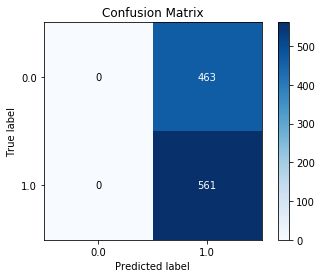

In [60]:
# The model performance is not satisfying.
# Not a single prediction of False is made by the classifier,
# indicating the Doc2Vec embedding parameters may need further tuning.

plot_cm(y_test, np.where(best_model_ANN1.predict(X_test) > 0.5, 1, 0))

## CNN

In [61]:
def to_sequence(tokenizer, preprocessor, index, text):
    words = tokenizer(preprocessor(text))
    indexes = [index[word] for word in words if word in index]
    return indexes

In [63]:
X_train, X_test, y_train, y_test = train_test_split(fake_news['statement_cleaned'], fake_news['Label'], test_size=0.1)
# Tokenization
word2idx = {word: idx for idx, word in enumerate(vectorizer.get_feature_names())}
tokenize = vectorizer.build_tokenizer()
preprocess = vectorizer.build_preprocessor()
X_train_sequences = [to_sequence(tokenize, preprocess, word2idx, x) for x in X_train]
X_test_sequences = [to_sequence(tokenize, preprocess, word2idx, x) for x in X_test]

# Compute max length among all news pieces
MAX_SEQ_LENGHT = len(max(X_train_sequences, key=len))
N_FEATURES = len(vectorizer.get_feature_names())

# Apply padding to train and test sets so that all inputs have same lengths
X_train_sequences = pad_sequences(X_train_sequences, maxlen=MAX_SEQ_LENGHT, value=N_FEATURES)
X_test_sequences = pad_sequences(X_test_sequences, maxlen=MAX_SEQ_LENGHT, value=N_FEATURES)

In [65]:
# Define hyper-param grid for tuning CNN
param_CNN = {'cells': [2 ** x for x in range(5, 8)], 'opt': ['adam'], 
             'drop': [0.1, 0.2, 0.3, 0.5, 0.7],
             'batch_size': [64], 'epochs': [3, 5], 
             'layer': range(1, 3), 'filter': [3, 5]}

In [66]:
def create_CNN(layer=1, filter=5, pool=5, actv='relu', opt='adam', drop=0.0, cells=16):
    model = Sequential()
    model.add(Embedding(len(vectorizer.get_feature_names()) + 1, 64,
                        input_length=MAX_SEQ_LENGHT))
    if layer == 1:
        model.add(Conv1D(64, filter, activation='relu'))
        model.add(MaxPooling1D(filter))
        model.add(Flatten())
        model.add(Dense(units=cells, activation='relu'))
        model.add(Dropout(drop))
        
    if layer == 2:
        model.add(Conv1D(64, filter, activation='relu'))
        model.add(MaxPooling1D(filter))
        model.add(Flatten())
        model.add(Dense(units=cells, activation='relu'))
        model.add(Dropout(drop))
        model.add(Dense(units=int(cells / 2), activation='relu'))
        model.add(Dropout(drop))
    
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [67]:
model_CNN = KerasClassifier(build_fn=create_CNN, verbose=1)

# Initialize gridsearchcv
grid_CNN = GridSearchCV(estimator=model_CNN, param_grid=param_CNN, 
                    cv=ShuffleSplit(n_splits=1, test_size=0.1, random_state=8017), n_jobs=1)

# Training and tuning
grid_result_CNN = grid_CNN.fit(X_train_sequences, y_train)
joblib.dump(grid_CNN.best_estimator_, 'best_CNN.pkl')

# Summarize results
print("Best: %f using %s" % (grid_result_CNN.best_score_, grid_result_CNN.best_params_))
means_CNN = grid_result_CNN.cv_results_['mean_test_score']
params_CNN = grid_result_CNN.cv_results_['params']
for mean, param in zip(means_CNN, params_CNN):
    print("%f with: %r" % (mean, param))

Epoch 1/3
8294/8294 [==============================] - 15s 2ms/step - loss: 0.6826 - acc: 0.5602
Epoch 2/3
8294/8294 [==============================] - 2s 185us/step - loss: 0.6323 - acc: 0.6323
Epoch 3/3
8294/8294 [==============================] - 1s 115us/step
Epoch 1/3
8294/8294 [==============================] - 12s 1ms/step - loss: 0.6820 - acc: 0.5621
Epoch 2/3
8294/8294 [==============================] - 2s 194us/step - loss: 0.6329 - acc: 0.6460
Epoch 3/3
8294/8294 [==============================] - 1s 124us/step
Epoch 1/3
8294/8294 [==============================] - 12s 2ms/step - loss: 0.6830 - acc: 0.5626
Epoch 2/3
8294/8294 [==============================] - 2s 202us/step - loss: 0.6245 - acc: 0.6456
Epoch 3/3
8294/8294 [==============================] - 1s 138us/step
Epoch 1/3
8294/8294 [==============================] - 13s 2ms/step - loss: 0.6847 - acc: 0.5623
Epoch 2/3
8294/8294 [==============================] - 2s 202us/step - loss: 0.6484 - acc: 0.6101
Epoch 3/3
829

8294/8294 [==============================] - 16s 2ms/step - loss: 0.6889 - acc: 0.5576
Epoch 2/3
8294/8294 [==============================] - 2s 207us/step - loss: 0.6663 - acc: 0.5823
Epoch 3/3
8294/8294 [==============================] - 1s 139us/step
Epoch 1/3
8294/8294 [==============================] - 16s 2ms/step - loss: 0.6902 - acc: 0.5464
Epoch 2/3
8294/8294 [==============================] - 2s 223us/step - loss: 0.6865 - acc: 0.5625
Epoch 3/3
8294/8294 [==============================] - 1s 140us/step
Epoch 1/3
8294/8294 [==============================] - 16s 2ms/step - loss: 0.6880 - acc: 0.5609
Epoch 2/3
8294/8294 [==============================] - 2s 216us/step - loss: 0.6615 - acc: 0.5701
Epoch 3/3
8294/8294 [==============================] - 1s 138us/step
Epoch 1/3
8294/8294 [==============================] - 17s 2ms/step - loss: 0.6900 - acc: 0.5514
Epoch 2/3
8294/8294 [==============================] - 2s 229us/step - loss: 0.6867 - acc: 0.5629
Epoch 3/3
8294/8294 [==

8294/8294 [==============================] - 2s 295us/step - loss: 0.6264 - acc: 0.6420
Epoch 3/3
8294/8294 [==============================] - 2s 232us/step
Epoch 1/3
8294/8294 [==============================] - 26s 3ms/step - loss: 0.6865 - acc: 0.5591: 7s - loss: 0.6866 - a
Epoch 2/3
8294/8294 [==============================] - 3s 320us/step - loss: 0.6666 - acc: 0.5660
Epoch 3/3
8294/8294 [==============================] - 2s 258us/step
Epoch 1/3
8294/8294 [==============================] - 28s 3ms/step - loss: 0.6834 - acc: 0.5635
Epoch 2/3
8294/8294 [==============================] - 3s 327us/step - loss: 0.6397 - acc: 0.6382
Epoch 3/3
8294/8294 [==============================] - 2s 208us/step
Epoch 1/3
8294/8294 [==============================] - 20s 2ms/step - loss: 0.6869 - acc: 0.5559
Epoch 2/3
8294/8294 [==============================] - 2s 252us/step - loss: 0.6644 - acc: 0.5757
Epoch 3/3
8294/8294 [==============================] - 1s 176us/step
Epoch 1/5
8294/8294 [=======

8294/8294 [==============================] - 2s 292us/step - loss: 0.6092 - acc: 0.6683
Epoch 3/3
8294/8294 [==============================] - 2s 215us/step
Epoch 1/3
8294/8294 [==============================] - 25s 3ms/step - loss: 0.6836 - acc: 0.5610
Epoch 2/3
8294/8294 [==============================] - 2s 299us/step - loss: 0.6325 - acc: 0.6338
Epoch 3/3
8294/8294 [==============================] - 2s 213us/step
Epoch 1/3
8294/8294 [==============================] - 24s 3ms/step - loss: 0.6792 - acc: 0.5660
Epoch 2/3
8294/8294 [==============================] - 2s 300us/step - loss: 0.6085 - acc: 0.6700
Epoch 3/3
8294/8294 [==============================] - 2s 214us/step
Epoch 1/3
8294/8294 [==============================] - 25s 3ms/step - loss: 0.6825 - acc: 0.5610
Epoch 2/3
8294/8294 [==============================] - 2s 301us/step - loss: 0.6255 - acc: 0.6516
Epoch 3/3
8294/8294 [==============================] - 2s 223us/step
Epoch 1/5
8294/8294 [==============================

In [69]:
grid_result_CNN.best_params_

{'batch_size': 64,
 'cells': 64,
 'drop': 0.1,
 'epochs': 3,
 'filter': 5,
 'layer': 2,
 'opt': 'adam'}

In [96]:
best_model_CNN = create_CNN(cells=64, drop=0.1, layer=2)
best_model_CNN.fit(X_train_sequences, y_train, batch_size=64, epochs=3)

Epoch 1/3
9216/9216 [==============================] - 122s 13ms/step - loss: 0.6872 - acc: 0.5612
Epoch 2/3
9216/9216 [==============================] - 5s 583us/step - loss: 0.6748 - acc: 0.5693
Epoch 3/3
9216/9216 [==============================] - 6s 643us/step - loss: 0.4998 - acc: 0.7553


In [97]:
score = best_model_CNN.evaluate(X_test_sequences, y_test)[1]
print(score)

1024/1024 [==============================] - 44s 43ms/step
0.5107421875


C:\Users\Xu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)


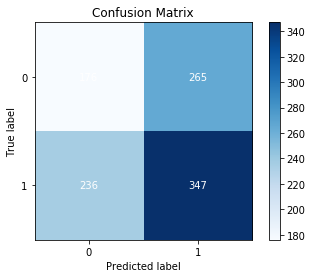

In [98]:
plot_cm(y_test, np.where(best_model_CNN.predict(X_test_sequences) > 0.5, 1, 0))

## LSTM-RNN

In [ ]:
# file = './data/glove.twitter.27B.zip'
# url = 'http://nlp.stanford.edu/data/glove.twitter.27B.zip'
# downloadData(file, url)

# We also tried to embed using the 50d, 100d, and 200d of glove.6B
# however, the results are not promising.

In [7]:
# with open('./data/glove.twitter.27B.100d.txt','rb') as f:
with open('C:/Users/Xu/PycharmProjects/STAT8017_Project/glove.twitter.27B/glove.twitter.27B.100d.txt','rb') as f:
    lines = f.readlines()
    
glove_weights = np.zeros((len(lines), 100))
words = []
for i, line in enumerate(lines):
    word_weights = line.split()
    words.append(word_weights[0])
    weight = word_weights[1:]
    glove_weights[i] = np.array([float(w) for w in weight])
word_vocab = [w.decode("utf-8") for w in words]

word2glove = dict(zip(word_vocab, glove_weights))

time: 41.1 s


In [8]:
# A modification of the Embedding Layer class in Keras
# so that we are able to "customize" the fixed_weights input
# with GloVe embedding vectors for word_in_glove.
class Embedding2(Layer):

    def __init__(self, input_dim, output_dim, fixed_weights, 
                 embeddings_initializer='uniform', input_length=None, **kwargs):
        kwargs['dtype'] = 'int32'
        
        if 'input_shape' not in kwargs:
            if input_length:
                kwargs['input_shape'] = (input_length,)
            else:
                kwargs['input_shape'] = (None,)
        
        super(Embedding2, self).__init__(**kwargs)
    
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.embeddings_initializer = embeddings_initializer
        self.fixed_weights = fixed_weights
        self.num_trainable = input_dim - len(fixed_weights)
        self.input_length = input_length
        
        w_mean = fixed_weights.mean(axis=0)
        w_std = fixed_weights.std(axis=0)
        self.variable_weights = w_mean + w_std * np.random.randn(self.num_trainable, output_dim)

    def build(self, input_shape, name='embeddings'):        
        fixed_weight = K.variable(self.fixed_weights, name=name + '_fixed')
        variable_weight = K.variable(self.variable_weights, name=name + '_var')
        
        self._trainable_weights.append(variable_weight)
        self._non_trainable_weights.append(fixed_weight)
        
        self.embeddings = K.concatenate([fixed_weight, variable_weight], axis=0)
        
        self.built = True

    def call(self, inputs):
        if K.dtype(inputs) != 'int32':
            inputs = K.cast(inputs, 'int32')
        out = K.gather(self.embeddings, inputs)
        return out

    def compute_output_shape(self, input_shape):
        if not self.input_length:
            input_length = input_shape[1]
        else:
            input_length = self.input_length
        return (input_shape[0], input_length, self.output_dim)

time: 2.99 ms


In [9]:
# Data pre-processing shows that word length of 22 is approximately
# the 3rd quartile of word length distribution of our dataset.
def Padding(news_list, n=22):
    for i, news in enumerate(news_list):
        if len(news) < n:
            news_list[i] = news + [word_index['<PAD>']] * (n - len(news))
        elif len(news) > n:
            news_list[i] = news[ :n]
        else:
            continue
    return news_list

time: 2.99 ms


In [10]:
df = fake_news.copy()

# Term frequency + matching with GloVe data
all_news = ' '.join(df.statement_cleaned.values)
words = all_news.split()
words_counter = Counter(words).most_common()
words_count = words_counter
words_frequent = [w[0] for w in words_counter if w[1] > 1] # Consider words with frequence >= 2.

words_total = [w for w, c in words_counter]
word_vocab = dict(zip(word_vocab, range(len(word_vocab))))
word_in_glove = np.array([w in word_vocab for w in words_total])

words_in_glove = [w for w, is_true in zip(words_total, word_in_glove) if is_true]
words_not_in_glove = [w for w, is_true in zip(words_total, word_in_glove) if not is_true]

print('Percentage of unique words in GloVe vectors: ', sum(word_in_glove) / len(word_in_glove))

# Create dictionary from GloVe matching
word_index_glove = dict(zip(words_in_glove, range(len(words_in_glove))))
len_in_glove_words = len(word_index_glove)
freq_words_not_in_glove = [w for w in words_not_in_glove if w in words_frequent]
word_index_not_glove = dict(zip(freq_words_not_in_glove, 
                                range(len(word_index_glove), len(word_index_glove) + len(freq_words_not_in_glove))))

# Mapping word to integer, and inverse mapping for ability to recover text from integer
word_index = dict(**word_index_glove, **word_index_not_glove)
word_index['<ALIEN>'] = len(word_index) # For mapping "alien" words not in word_index
index_word = dict(zip(word_index.values(), word_index.keys()))

word_int = [[word_index[w] if w in word_index else word_index['<ALIEN>'] 
             for w in content.split()] for content in df.statement_cleaned.values]

# Artificially assign maximum length as mapping integer for <PAD>
index_word[len(word_index)] = '<PAD>'
word_index['<PAD>'] = len(word_index)

# Pad news to same lengths for RNN model
word_int = Padding(word_int)

# Generate train test arrays
X = np.array(word_int)
y = (df.Label.values).astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=8017)

Percentage of unique words in GloVe vectors:  0.5197688097795509
time: 1.57 s


### _LSTM without fixed weights adjusted according to GloVe_

In [24]:
def create_RNN(layer=0, ndim=10, drop=0.0, cells=16, rate=0.001):
    if layer == 0:
        model = Sequential()
        model.add(Embedding(len(word_index), 10))
        model.add(LSTM(cells))
        
    if layer == 1:
        model = Sequential()
        model.add(Embedding(len(word_index), 10))
        model.add(LSTM(cells))
        model.add(Dense(cells, activation='relu'))
        model.add(Dropout(drop))
    
    if layer == 2:
        model = Sequential()
        model.add(Embedding(len(word_index), 10))
        model.add(LSTM(cells))
        model.add(Dense(cells, activation='relu'))
        model.add(Dropout(drop))
        model.add(Dense(int(cells / 2), activation='relu'))
        model.add(Dropout(drop))
        
    model.add(Dense(1, activation='sigmoid'))
    rmsprop = RMSprop(rate)
    model.compile(loss='binary_crossentropy', optimizer=rmsprop, metrics=['accuracy'])
    return model

time: 1.99 ms


In [27]:
# Define hyper-param grid for tuning RNN
param_RNN = {'cells': [2 ** x for x in range(5, 10)], 'rate': [0.001, 0.002], 
             'drop': [0.1, 0.2, 0.3, 0.5, 0.7], 'ndim': [10, 50, 100],
             'batch_size': [64], 'epochs': [3], 
             'layer': range(0, 3)}

time: 997 µs


In [ ]:
model_RNN = KerasClassifier(build_fn=create_RNN, verbose=1)

# Initialize gridsearchcv
grid_RNN = GridSearchCV(estimator=model_RNN, param_grid=param_RNN, 
                    cv=ShuffleSplit(n_splits=1, test_size=0.1, random_state=8017), n_jobs=1)

# Training and tuning
grid_result_RNN = grid_RNN.fit(X_train, y_train)
joblib.dump(grid_RNN.best_estimator_, 'best_RNN.pkl')

# Summarize results
print("Best: %f using %s" % (grid_result_RNN.best_score_, grid_result_RNN.best_params_))
means_RNN = grid_result_RNN.cv_results_['mean_test_score']
params_RNN = grid_result_RNN.cv_results_['params']
for mean, param in zip(means_RNN, params_RNN):
    print("%f with: %r" % (mean, param))

Epoch 1/3
8294/8294 [==============================] - 41s 5ms/step - loss: 0.6846 - acc: 0.5594
Epoch 2/3
8294/8294 [==============================] - 5s 595us/step - loss: 0.6479 - acc: 0.6160
Epoch 3/3
8294/8294 [==============================] - 1s 139us/step
Epoch 1/3
8294/8294 [==============================] - 39s 5ms/step - loss: 0.6728 - acc: 0.5817
Epoch 2/3
8294/8294 [==============================] - 5s 579us/step - loss: 0.5950 - acc: 0.6910
Epoch 3/3
8294/8294 [==============================] - 1s 142us/step
Epoch 1/3
8294/8294 [==============================] - 40s 5ms/step - loss: 0.6826 - acc: 0.5632
Epoch 2/3
8294/8294 [==============================] - 5s 567us/step - loss: 0.6374 - acc: 0.6333
Epoch 3/3
8294/8294 [==============================] - 1s 145us/step
Epoch 1/3
8294/8294 [==============================] - 39s 5ms/step - loss: 0.6747 - acc: 0.5722
Epoch 2/3
8294/8294 [==============================] - 5s 588us/step - loss: 0.5990 - acc: 0.6794
Epoch 3/3
829

8294/8294 [==============================] - 55s 7ms/step - loss: 0.6850 - acc: 0.5592
Epoch 2/3
8294/8294 [==============================] - 5s 661us/step - loss: 0.6442 - acc: 0.6231
Epoch 3/3
8294/8294 [==============================] - 1s 159us/step
Epoch 1/3
8294/8294 [==============================] - 58s 7ms/step - loss: 0.6792 - acc: 0.5651
Epoch 2/3
8294/8294 [==============================] - 6s 665us/step - loss: 0.6079 - acc: 0.6724
Epoch 3/3
8294/8294 [==============================] - 1s 157us/step
Epoch 1/3
8294/8294 [==============================] - 57s 7ms/step - loss: 0.6853 - acc: 0.5591
Epoch 2/3
8294/8294 [==============================] - 5s 656us/step - loss: 0.6492 - acc: 0.6184
Epoch 3/3
8294/8294 [==============================] - 1s 156us/step
Epoch 1/3
8294/8294 [==============================] - 56s 7ms/step - loss: 0.6782 - acc: 0.5658
Epoch 2/3
8294/8294 [==============================] - 6s 672us/step - loss: 0.6075 - acc: 0.6771
Epoch 3/3
8294/8294 [==

8294/8294 [==============================] - 1s 177us/step
Epoch 1/3
8294/8294 [==============================] - 82s 10ms/step - loss: 0.6871 - acc: 0.5576
Epoch 2/3
8294/8294 [==============================] - 7s 888us/step - loss: 0.6554 - acc: 0.6121
Epoch 3/3
8294/8294 [==============================] - 2s 196us/step
Epoch 1/3
8294/8294 [==============================] - 79s 10ms/step - loss: 0.6858 - acc: 0.5563
Epoch 2/3
8294/8294 [==============================] - 6s 716us/step - loss: 0.6401 - acc: 0.6547
Epoch 3/3
8294/8294 [==============================] - 2s 185us/step
Epoch 1/3
8294/8294 [==============================] - 77s 9ms/step - loss: 0.6874 - acc: 0.5584
Epoch 2/3
8294/8294 [==============================] - 6s 738us/step - loss: 0.6693 - acc: 0.5805 
Epoch 3/3
8294/8294 [==============================] - 1s 178us/step
Epoch 1/3
8294/8294 [==============================] - 76s 9ms/step - loss: 0.6866 - acc: 0.5565
Epoch 2/3
8294/8294 [============================

8294/8294 [==============================] - 102s 12ms/step - loss: 0.6812 - acc: 0.5650
Epoch 2/3
8294/8294 [==============================] - 8s 918us/step - loss: 0.6133 - acc: 0.6718
Epoch 3/3
8294/8294 [==============================] - 2s 215us/step
Epoch 1/3
8294/8294 [==============================] - 106s 13ms/step - loss: 0.6848 - acc: 0.5592
Epoch 2/3
8294/8294 [==============================] - 8s 909us/step - loss: 0.6476 - acc: 0.6130
Epoch 3/3
8294/8294 [==============================] - 2s 218us/step
Epoch 1/3
8294/8294 [==============================] - 103s 12ms/step - loss: 0.6848 - acc: 0.5651
Epoch 2/3
8294/8294 [==============================] - 8s 922us/step - loss: 0.6228 - acc: 0.6643
Epoch 3/3
8294/8294 [==============================] - 2s 204us/step
Epoch 1/3
8294/8294 [==============================] - 108s 13ms/step - loss: 0.6854 - acc: 0.5635
Epoch 2/3
8294/8294 [==============================] - 8s 947us/step - loss: 0.6411 - acc: 0.6378 
Epoch 3/3
8294

8294/8294 [==============================] - 2s 300us/step
Epoch 1/3
8294/8294 [==============================] - 156s 19ms/step - loss: 0.6852 - acc: 0.5582
Epoch 2/3
8294/8294 [==============================] - 9s 1ms/step - loss: 0.6426 - acc: 0.6396
Epoch 3/3
8294/8294 [==============================] - 3s 325us/step
Epoch 1/3
8294/8294 [==============================] - 177s 21ms/step - loss: 0.6874 - acc: 0.5571
Epoch 2/3
8294/8294 [==============================] - 11s 1ms/step - loss: 0.6482 - acc: 0.6395
Epoch 3/3
8294/8294 [==============================] - 2s 285us/step
Epoch 1/3
8294/8294 [==============================] - 138s 17ms/step - loss: 0.6868 - acc: 0.5633
Epoch 2/3
8294/8294 [==============================] - 9s 1ms/step - loss: 0.6417 - acc: 0.6368
Epoch 3/3
8294/8294 [==============================] - 2s 286us/step
Epoch 1/3
8294/8294 [==============================] - 141s 17ms/step - loss: 0.6836 - acc: 0.5597
Epoch 2/3
8294/8294 [============================

Both the LSTM-RNN models (with/without fixed_weights from GloVe), run ___much much more slowly___ when using GridSearchCV than using Keras alone. We consider that this is probably due to the _use of Scikit-Learn API together with Keras wrapper_. For the sake of limited computing power, we therefore, reduced the number of hyper-parameters for tuning and ran GridSearch for only the LSTM model with fixed weights from pre-trained GloVe embeddings. On the contrary, we simply display the best model that we found during manual parameter tuning for the above case.

In [95]:
pre_sel_model_RNN = Sequential()
pre_sel_model_RNN.add(Embedding(len(word_index), 10)) # , batch_size=batch_size
pre_sel_model_RNN.add(LSTM(16))
pre_sel_model_RNN.add(Dense(1, activation='sigmoid'))

rmsprop = RMSprop(lr=0.001)
pre_sel_model_RNN.compile(loss='binary_crossentropy', optimizer=rmsprop, metrics=['accuracy'])
pre_sel_model_RNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_292 (Embedding)    (None, None, 10)          130810    
_________________________________________________________________
lstm_169 (LSTM)              (None, 16)                1728      
_________________________________________________________________
dense_1329 (Dense)           (None, 1)                 17        
Total params: 132,555
Trainable params: 132,555
Non-trainable params: 0
_________________________________________________________________


In [35]:
pre_sel_model_RNN.fit(X_train, y_train, batch_size=64, epochs=3, validation_split=0.1)

Train on 8294 samples, validate on 922 samples
Epoch 1/3
8294/8294 [==============================] - 5s 571us/step - loss: 0.6858 - acc: 0.5622 - val_loss: 0.6856 - val_acc: 0.5466
Epoch 2/3
8294/8294 [==============================] - 3s 396us/step - loss: 0.6563 - acc: 0.5954 - val_loss: 0.6676 - val_acc: 0.5889
Epoch 3/3
8294/8294 [==============================] - 3s 393us/step - loss: 0.5985 - acc: 0.6880 - val_loss: 0.6767 - val_acc: 0.5900


In [36]:
test_score = pre_sel_model_RNN.evaluate(X_test, y_test, batch_size=64)
print(test_score)

1024/1024 [==============================] - 0s 89us/step
[0.6649940982460976, 0.6201171875]


### _LSTM with fixed weights adjusted according to GloVe_

In [13]:
def create_RNN1(layer=0, drop=0.0, cells=16, rate=0.001):
    if layer == 0:
        model = Sequential()
        model.add(Embedding2(len(word_index), 100,
                            fixed_weights=np.array([word2glove[w] for w in words_in_glove])))
        model.add(LSTM(cells))
        
    if layer == 1:
        model = Sequential()
        model.add(Embedding(len(word_index), 10))
        model.add(LSTM(cells))
        model.add(Dense(cells, activation='relu'))
        model.add(Dropout(drop))
    
    if layer == 2:
        model = Sequential()
        model.add(Embedding(len(word_index), 10))
        model.add(LSTM(cells))
        model.add(Dense(cells, activation='relu'))
        model.add(Dropout(drop))
        model.add(Dense(int(cells / 2), activation='relu'))
        model.add(Dropout(drop))
        
    model.add(Dense(1, activation='sigmoid'))
    rmsprop = RMSprop(rate)
    model.compile(loss='binary_crossentropy', optimizer=rmsprop, metrics=['accuracy'])
    return model

time: 3.02 ms


In [14]:
# Define hyper-param grid for tuning RNN1
param_RNN1 = {'cells': [2 ** x for x in range(5, 10)], 'rate': [0.001, 0.002, 0.003], 
             'drop': [0.1, 0.2, 0.3, 0.5, 0.7],
             'batch_size': [64], 'epochs': [3], 
             'layer': range(1, 3)}

time: 3.99 ms


In [15]:
model_RNN1 = KerasClassifier(build_fn=create_RNN1, verbose=1)

# Initialize gridsearchcv
grid_RNN1 = GridSearchCV(estimator=model_RNN1, param_grid=param_RNN1, 
                    cv=ShuffleSplit(n_splits=1, test_size=0.1, random_state=8017), n_jobs=1)

# Training and tuning
grid_result_RNN1 = grid_RNN1.fit(X_train, y_train)
joblib.dump(grid_RNN1.best_estimator_, 'best_RNN1.pkl')

# Summarize results
print("Best: %f using %s" % (grid_result_RNN1.best_score_, grid_result_RNN1.best_params_))
means_RNN1 = grid_result_RNN1.cv_results_['mean_test_score']
params_RNN1 = grid_result_RNN1.cv_results_['params']
for mean, param in zip(means_RNN1, params_RNN1):
    print("%f with: %r" % (mean, param))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/3
8294/8294 [==============================] - 7s 816us/step - loss: 0.6844 - acc: 0.5579
Epoch 2/3
8294/8294 [==============================] - 3s 408us/step - loss: 0.6391 - acc: 0.6317
Epoch 3/3
8294/8294 [==============================] - 1s 100us/step
Epoch 1/3
8294/8294 [==============================] - 4s 498us/step - loss: 0.6762 - acc: 0.5774
Epoch 2/3
8294/8294 [==============================] - 4s 428us/step - loss: 0.6038 - acc: 0.6790
Epoch 3/3
8294/8294 [==============================] - 1s 111us/step
Epoch 1/3
8294/8294 [==============================] - 4s 523us/step - loss: 0.6765 - acc: 0.5717
Epoch 2/3
8294/8294 [==============================] - 4s 445us/step - loss: 0.5958 - acc: 0.6893
Epoch 3/3
8294/8294 [==================

8294/8294 [==============================] - 4s 456us/step - loss: 0.6067 - acc: 0.6816
Epoch 3/3
8294/8294 [==============================] - 1s 104us/step
Epoch 1/3
8294/8294 [==============================] - 8s 988us/step - loss: 0.6782 - acc: 0.5667
Epoch 2/3
8294/8294 [==============================] - 4s 445us/step - loss: 0.6106 - acc: 0.6702
Epoch 3/3
8294/8294 [==============================] - 1s 106us/step
Epoch 1/3
8294/8294 [==============================] - 8s 997us/step - loss: 0.6862 - acc: 0.5602
Epoch 2/3
8294/8294 [==============================] - 4s 445us/step - loss: 0.6400 - acc: 0.6354
Epoch 3/3
8294/8294 [==============================] - 1s 100us/step
Epoch 1/3
8294/8294 [==============================] - 9s 1ms/step - loss: 0.6811 - acc: 0.5675
Epoch 2/3
8294/8294 [==============================] - 4s 462us/step - loss: 0.6106 - acc: 0.6784
Epoch 3/3
8294/8294 [==============================] - 1s 101us/step
Epoch 1/3
8294/8294 [=============================

8294/8294 [==============================] - 4s 473us/step - loss: 0.6408 - acc: 0.6394
Epoch 3/3
8294/8294 [==============================] - 1s 109us/step
Epoch 1/3
8294/8294 [==============================] - 15s 2ms/step - loss: 0.6841 - acc: 0.5650
Epoch 2/3
8294/8294 [==============================] - 4s 462us/step - loss: 0.6272 - acc: 0.6512
Epoch 3/3
8294/8294 [==============================] - 1s 110us/step
Epoch 1/3
8294/8294 [==============================] - 15s 2ms/step - loss: 0.6857 - acc: 0.5645
Epoch 2/3
8294/8294 [==============================] - 4s 461us/step - loss: 0.6304 - acc: 0.6535
Epoch 3/3
8294/8294 [==============================] - 1s 112us/step
Epoch 1/3
8294/8294 [==============================] - 15s 2ms/step - loss: 0.6876 - acc: 0.5647
Epoch 2/3
8294/8294 [==============================] - 4s 457us/step - loss: 0.6123 - acc: 0.6731
Epoch 3/3
8294/8294 [==============================] - 1s 116us/step
Epoch 1/3
8294/8294 [==============================

8294/8294 [==============================] - 4s 533us/step - loss: 0.6681 - acc: 0.5891
Epoch 3/3
8294/8294 [==============================] - 1s 128us/step
Epoch 1/3
8294/8294 [==============================] - 26s 3ms/step - loss: 0.6894 - acc: 0.5569
Epoch 2/3
8294/8294 [==============================] - 4s 536us/step - loss: 0.6856 - acc: 0.5570
Epoch 3/3
8294/8294 [==============================] - 1s 128us/step
Epoch 1/3
8294/8294 [==============================] - 27s 3ms/step - loss: 0.6989 - acc: 0.5547
Epoch 2/3
8294/8294 [==============================] - 4s 539us/step - loss: 0.6876 - acc: 0.5543
Epoch 3/3
8294/8294 [==============================] - 1s 134us/step
Epoch 1/3
8294/8294 [==============================] - 27s 3ms/step - loss: 0.6875 - acc: 0.5579
Epoch 2/3
8294/8294 [==============================] - 4s 516us/step - loss: 0.6849 - acc: 0.5726
Epoch 3/3
8294/8294 [==============================] - 1s 129us/step
Epoch 1/3
8294/8294 [==============================

In [16]:
grid_RNN1.best_params_

{'batch_size': 64,
 'cells': 32,
 'drop': 0.5,
 'epochs': 3,
 'layer': 2,
 'rate': 0.001}

time: 5.98 ms


In [17]:
best_model_RNN1 = create_RNN1(cells=32, drop=0.5, layer=2, rate=0.001)
best_model_RNN1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_152 (Embedding)    (None, None, 10)          130810    
_________________________________________________________________
lstm_152 (LSTM)              (None, 32)                5504      
_________________________________________________________________
dense_379 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_228 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_380 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_229 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_381 (Dense)            (None, 1)                 17        
Total para

In [19]:
best_model_RNN1.fit(X_train, y_train, batch_size=64, epochs=3)

Epoch 1/3
9216/9216 [==============================] - 6s 703us/step - loss: 0.6689 - acc: 0.5611
Epoch 2/3
9216/9216 [==============================] - 6s 703us/step - loss: 0.6395 - acc: 0.6310
Epoch 3/3
9216/9216 [==============================] - 6s 654us/step - loss: 0.5983 - acc: 0.6918


time: 19 s


In [20]:
score_RNN1 = best_model_RNN1.evaluate(X_test, y_test)[1]
print(score_RNN1)

1024/1024 [==============================] - 13s 13ms/step
0.59765625
time: 13.4 s


C:\Users\Xu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Xu\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


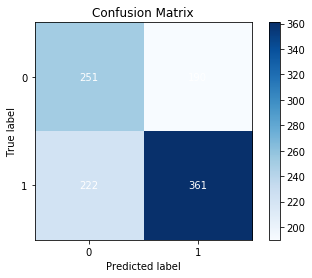

time: 13.4 s


In [23]:
plot_cm(y_test, np.where(best_model_RNN1.predict(X_test) > 0.5, 1, 0))

In [100]:
pre_sel_model_RNN1 = Sequential()
pre_sel_model_RNN1.add(Embedding2(len(word_index), 100,
                    fixed_weights=np.array([word2glove[w] for w in words_in_glove])))
pre_sel_model_RNN1.add(LSTM(16))
pre_sel_model_RNN1.add(Dense(8, activation='relu'))
pre_sel_model_RNN1.add(Dense(2, activation='relu'))
pre_sel_model_RNN1.add(Dense(1, activation='sigmoid'))

rmsprop_2 = RMSprop(lr=0.0016)
pre_sel_model_RNN1.compile(loss='binary_crossentropy', optimizer=rmsprop_2, metrics=['accuracy'])
pre_sel_model_RNN1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding2_1 (Embedding2)    (None, None, 100)         1308100   
_________________________________________________________________
lstm_170 (LSTM)              (None, 16)                7488      
_________________________________________________________________
dense_1333 (Dense)           (None, 8)                 136       
_________________________________________________________________
dense_1334 (Dense)           (None, 2)                 18        
_________________________________________________________________
dense_1335 (Dense)           (None, 1)                 3         
Total params: 1,315,745
Trainable params: 299,545
Non-trainable params: 1,016,200
_________________________________________________________________


In [76]:
pre_sel_model_RNN1.fit(X_train, y_train, batch_size=64, epochs=5, validation_split=0.1)

Train on 8294 samples, validate on 922 samples
Epoch 1/5
8294/8294 [==============================] - 7s 828us/step - loss: 0.6833 - acc: 0.5631 - val_loss: 0.6778 - val_acc: 0.5456
Epoch 2/5
8294/8294 [==============================] - 3s 418us/step - loss: 0.6680 - acc: 0.5814 - val_loss: 0.6819 - val_acc: 0.5499
Epoch 3/5
8294/8294 [==============================] - 4s 425us/step - loss: 0.6583 - acc: 0.6062 - val_loss: 0.6687 - val_acc: 0.5759
Epoch 4/5
8294/8294 [==============================] - 3s 419us/step - loss: 0.6469 - acc: 0.6259 - val_loss: 0.6656 - val_acc: 0.5965
Epoch 5/5
8294/8294 [==============================] - 3s 419us/step - loss: 0.6320 - acc: 0.6463 - val_loss: 0.7053 - val_acc: 0.5824


In [77]:
test_score_2 = pre_sel_model_RNN1.evaluate(X_test, y_test, batch_size=64)
print(test_score_2)

1024/1024 [==============================] - 0s 103us/step
[0.6838350221514702, 0.6220703125]
